- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *5*
- *Topic :* *Implement k-NN algorithm*

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on - Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and - put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the - similarity. This means when new data appears then it can be easily classified into a well - suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is - used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on - underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training - set immediately instead it stores the dataset and at the time of classification, it - performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, - then it classifies that data into a category that is much similar to the new data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1=pd.DataFrame(pd.read_csv("./files/diabetes2.csv"))
df1.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
649,0,107,60,25,0,26.4,0.133,23,0
117,5,78,48,0,0,33.7,0.654,25,0
364,4,147,74,25,293,34.9,0.385,30,0
208,1,96,64,27,87,33.2,0.289,21,0


*Problem Statement:*
- **Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. It is a significant health issue globally, affecting millions of people. Early detection and management of diabetes are crucial for preventing complications and improving health outcomes.**

- **You are provided with a dataset containing various health metrics and indicators for a group of individuals, including information about whether each person has diabetes or not. Your task is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on their health attributes.**

KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

In [3]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
X1=df1[['Age','BloodPressure','Insulin','Glucose','BMI']]
y1=df1['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [8]:
X_train.shape,X_test.shape

((537, 5), (231, 5))

In [9]:
k = 3# Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [12]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)

,Actual,Predicted
668,0,0
324,0,1
624,0,0
690,0,1
473,0,0
204,0,1
97,0,0
336,0,0
568,0,1
148,0,0


In [13]:
correctly_classified = [1 if actual == predicted else 0 for actual, predicted in zip(results['Actual'], results['Predicted'])]

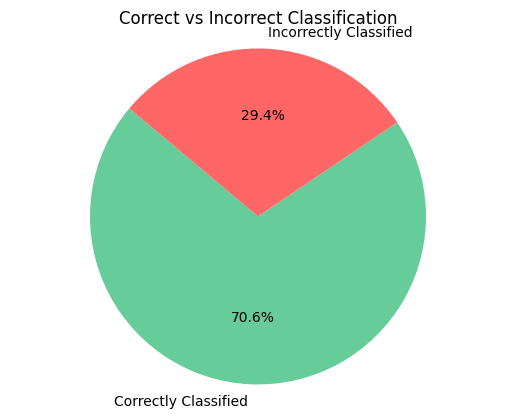

In [14]:
# Count number of correctly classified instances
num_correct = sum(correctly_classified)

# Count number of incorrectly classified instances (if needed)
num_incorrect = len(correctly_classified) - num_correct

# Create pie chart
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [num_correct, num_incorrect]
colors = ['#66CC99', '#FF6666']  # Green for correctly classified, Red for incorrectly classified

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Correct vs Incorrect Classification')
plt.show()

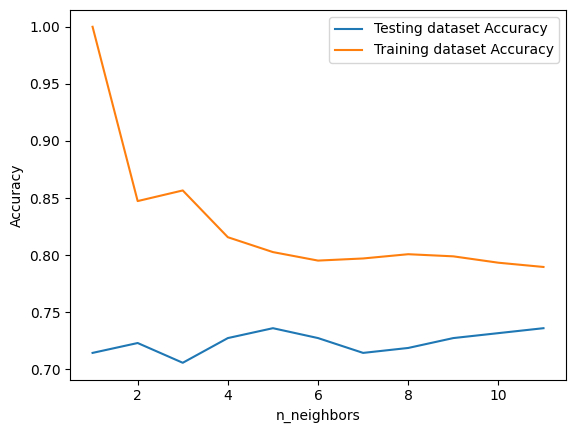

In [15]:
neighbors = np.arange(1, 12) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

Disadvantages of the KNN Algorithm
- Does not scale – As we have heard about this that the KNN algorithm is also considered a Lazy Algorithm. The main significance of - this term is that this takes lots of computing power as well as data storage. This makes this algorithm both time-consuming and - resource exhausting.
- Curse of Dimensionality – There is a term known as the peaking phenomenon according to this the KNN algorithm is affected by the - curse of dimensionality which implies the algorithm faces a hard time classifying the data points properly when the dimensionality is - too high.
- Prone to Overfitting – As the algorithm is affected due to the curse of dimensionality it is prone to the problem of overfitting as well. Hence generally feature selection as well as dimensionality reduction techniques are applied to deal with this problem.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the KNN ALGORITHM evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7056277056277056
Precision: 0.7039452921805863
Recall: 0.7056277056277056
F1 Score: 0.7047329197562375
Confusion Matrix:
 [[118  33]
 [ 35  45]]


In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
print("\n Classification report: \n",classification_rep)


 Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       151
           1       0.58      0.56      0.57        80

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [21]:
print("\n Confusion Matrix: \n",conf_matrix)


 Confusion Matrix: 
 [[118  33]
 [ 35  45]]


In [22]:
df1.head(2)
#'Age','BloodPressure','Insulin','Glucose','BMI'

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [23]:
#Predicting if the person is diabetic or not 
y1=knn.predict([[50,75,6,85,35]])
y1[0]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

**Patient does not have diabetes**

In [24]:
# Make predictions on training and testing data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


In [25]:
# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7895716945996276
Testing Accuracy: 0.7359307359307359


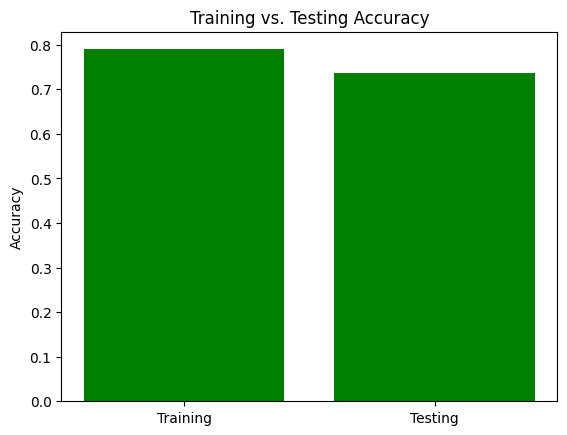

In [26]:
# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy],color="green")
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

Applications of the KNN Algorithm
- Data Preprocessing – While dealing with any Machine Learning problem we first perform the EDA part in which if we find that the data - contains missing values then there are multiple imputation methods are available as well. One of such method is KNN Imputer which is - quite effective ad generally used for sophisticated imputation methodologies.
- Pattern Recognition – KNN algorithms work very well if you have trained a KNN algorithm using the MNIST dataset and then performed - the evaluation process then you must have come across the fact that the accuracy is too high.
- Recommendation Engines – The main task which is performed by a KNN algorithm is to assign a new query point to a pre-existed group - that has been created using a huge corpus of datasets. This is exactly what is required in the recommender systems to assign each - user to a particular group and then provide them recommendations based on that group’s preferences.

**CONCLUSION**:
*The K-Nearest Neighbors (KNN) algorithm's 73.6% classification accuracy in predicting diabetes is promising. However, achieving a higher level of accuracy is crucial for dependable diagnosis in a medical setting. Further evaluation and exploration of alternative algorithms are warranted to ensure accurate and reliable diagnosis and treatment decisions.*